# Clustering the subsampled 1.3 M cells

The data consists in 20K Neurons, downsampled from *1.3 Million Brain Cells from E18 Mice* and is freely available from 10x Genomics ([here](http://cf.10xgenomics.com/samples/cell-exp/1.3.0/1M_neurons/1M_neurons_neuron20k.h5)).

In [1]:
import numpy as np
import pandas as pd
import scanpy.api as sc

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=70)  # dots (pixels) per inch determine size of inline figures
sc.logging.print_versions()

scanpy==1.2.2+73.g1812406 anndata==0.6.5+8.g1c05290 numpy==1.13.1 scipy==1.1.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata = sc.read_10x_h5('./data/1M_neurons_neuron20k.h5')

reading ./data/1M_neurons_neuron20k.h5 Variable names are not unique. To make them unique, call `.var_names_make_unique`.
(0:00:03.45)


In [3]:
adata.var_names_make_unique()

In [4]:
adata

AnnData object with n_obs × n_vars = 20000 × 27998 
    var: 'gene_ids'

Run standard preprocessing steps, see [here](https://scanpy.readthedocs.io/en/latest/api/scanpy.api.pp.recipe_zheng17.html#scanpy.api.pp.recipe_zheng17).

In [5]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
    finished (0:00:04.44)


In [6]:
sc.tl.pca(adata)

In [7]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished (0:00:09.81) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [8]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:17.18) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [9]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:03.69) --> found 22 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [10]:
sc.tl.paga(adata)

running partition-based graph abstraction (PAGA)
    finished (0:00:01.27) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


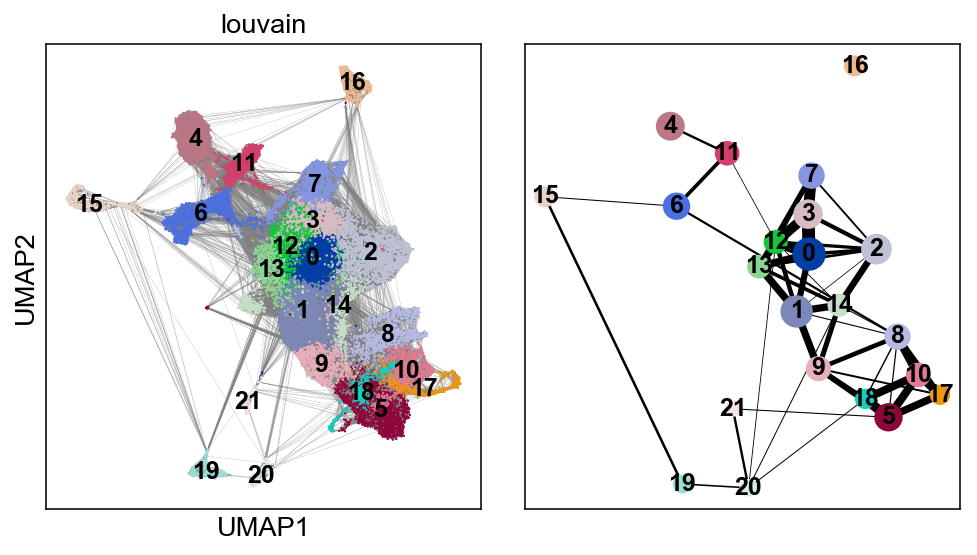

In [19]:
sc.pl.paga_compare(adata, edges=True, threshold=0.05)

Now compare this with the reference clustering of PAGA preprint, Suppl. Fig. 12, available from [here](https://www.dropbox.com/s/3yreak6qbpkp08t/louvain.csv.gz?dl=0).

In [12]:
anno = pd.read_csv('/Users/alexwolf/Dropbox/1M/louvain.csv.gz', compression='gzip', header=None, index_col=0)

In [13]:
anno.columns = ['louvain_ref']

In [14]:
adata.obs['louvain_ref'] = anno.loc[adata.obs.index]['louvain_ref'].astype(str)

... storing 'louvain_ref' as categorical


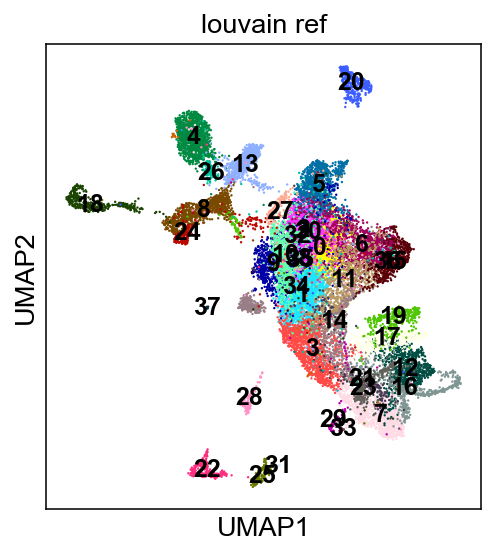

In [15]:
sc.pl.umap(adata, color=['louvain_ref'], legend_loc='on data')

In [16]:
adata.write('./write/subsampled.h5ad')